In [3]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Loading data
train = pd.read_csv('../../data/train_data_1031.csv', index_col='id')
test = pd.read_csv('../../data/test_data_1031.csv', index_col='id')
X_train = train.drop(columns='playtime_forever')
y_train = train['playtime_forever']

In [5]:
# Hypermeter selecting
parameters = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 300, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 5)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf = RandomForestRegressor()
rf_grid = RandomizedSearchCV(estimator=rf, param_distributions=parameters, cv=5,
                             verbose=3, n_jobs=-1, n_iter=100, random_state= 47)

In [6]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...b

In [7]:
rf_grid.best_params_

{'n_estimators': 188,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 35}

In [8]:
rf_grid.best_score_

0.2424068798416636

In [9]:
# Save the prediction
# rf = RandomForestRegressor(max_features= 'sqrt', n_estimators= 50, max_depth=60, bootstrap=False, min_samples_leaf=4,
#                            min_samples_split= 5 )
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
playtime_forever = rf.predict(test)
submission = pd.DataFrame(data=playtime_forever, columns=['playtime_forever'])
submission.index.name = 'id'
submission.to_csv('../../submission/rdf_1031_1106.csv')

## See the features importance of random forest

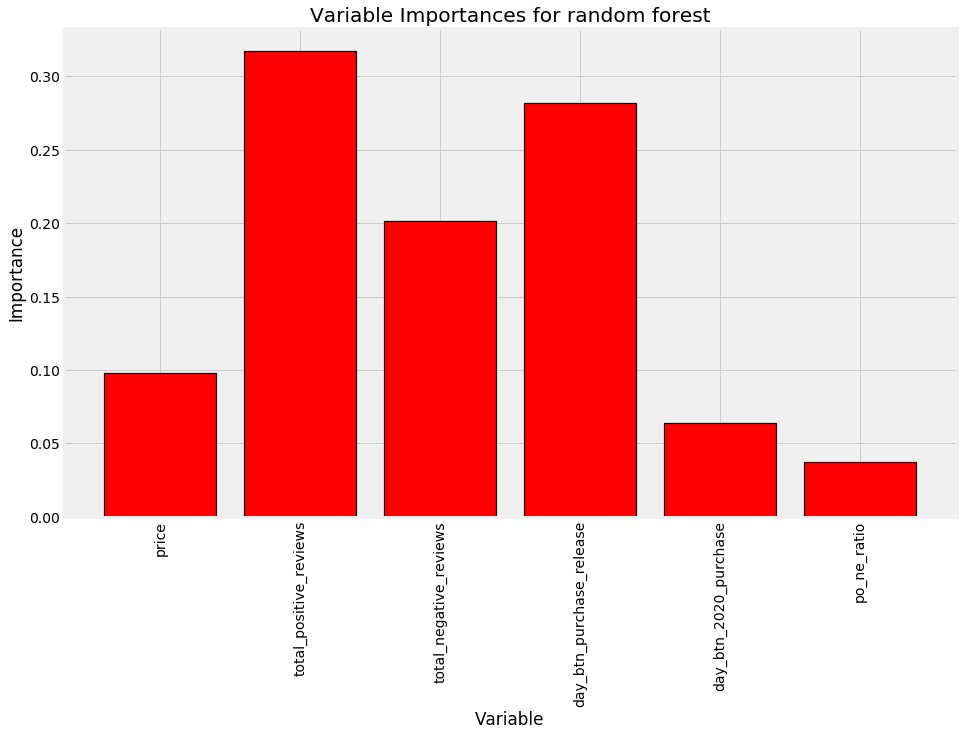

In [10]:
feature_list = list(X_train.columns)
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

plt.figure(figsize=(16,9))
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances for random forest');

In [11]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [13]:
-cv_results['test_score'].mean()

133.59825413369103